In [1]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

In [2]:
# Load the image and name it "image_array"
image = Image.open("Lenna.png").convert("RGB")
image_array = np.array(image)

In [3]:
# get size of the image
# width, height = image.size
# print(height, width)

height, width, channels = image_array.shape

print("Image height {}, width {}, number of channels {}".format(height, width, channels))

Image height 512, width 512, number of channels 3


In [4]:
def plot_image(new_img):
    plt.imshow(new_img, cmap='gray')
    plt.axis('off')  # Hide axes
    plt.show()

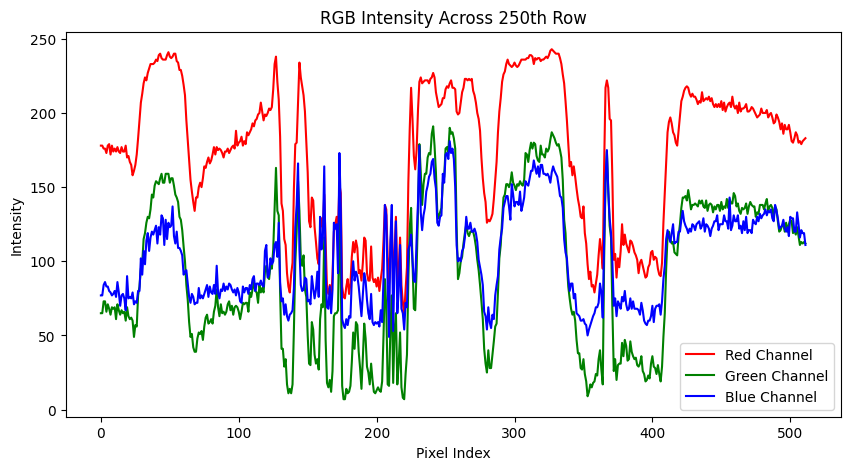

In [5]:
# Task 1: Analyze Color Channels Along a Specific Row

def analyze_color_channels(image_array):

    selected_row = image_array[249, :, :]

    red_channel = selected_row[:,0]
    green_channel = selected_row[:,1]
    blue_channel = selected_row[:,2]

    # Display the scanline as an image slice
    plt.figure(figsize=(10, 5))  

    plt.plot(red_channel, color='red', label='Red Channel')
    plt.plot(green_channel, color='green', label='Green Channel')
    plt.plot(blue_channel, color='blue', label='Blue Channel')
    plt.title('RGB Intensity Across 250th Row')
    plt.xlabel('Pixel Index')
    plt.ylabel('Intensity')
    plt.legend()

    # Save the visualization
    plt.savefig("1_scanline_image.png")

    plt.show()
    
    plt.close()
    

analyze_color_channels(image_array)

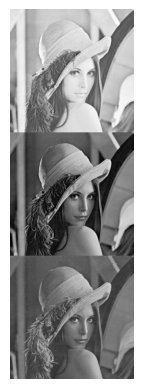

In [6]:
# Task 2: Channel-wise Image Stacking
# Approach
def stack_channels(image_array):
    r = image_array[:,:,0]
    g = image_array[:,:,1]
    b = image_array[:,:,2]

    stacked_array = np.concatenate([r,g,b])

    # Create the new image
    new_img = Image.fromarray(stacked_array)

    plot_image(new_img)

    # Save the new image
    new_img.save("2_concat.png")

stack_channels(image_array)

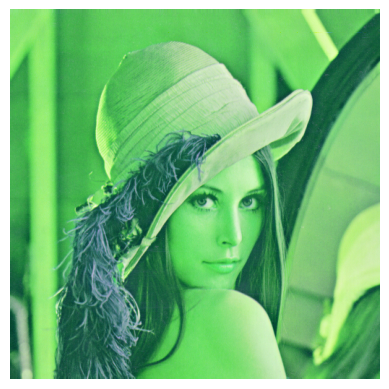

In [7]:
# Task 3: Swap Color Channels
def swap_channels(image_array):

    new_array = image_array.copy()
    new_array[:,:,1] = image_array[:,:,0]      # original red channel
    new_array[:,:,0] = image_array[:,:,1]      # oiringal green chaneel

    # Create the new image
    new_img = Image.fromarray(new_array)
    
    plot_image(new_img)
    
    # Save the new image
    new_img.save("3_swapchannel.png")



swap_channels(image_array)

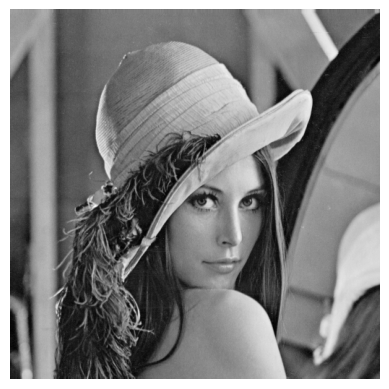

In [8]:
# Task 4: Convert to Grayscale
def convert_to_grayscale(image_array):

    """
    Method referenced from https://pillow.readthedocs.io/en/stable/reference/Image.html

    Above page has provided ITU-R 601-2 luma transform which is used in Image.convert() when converting 
    image to grayscale:
         L = R * 299/1000 + G * 587/1000 + B * 114/1000
    """

    gray_array = (0.299 * image_array[:, :, 0] +
                0.587 * image_array[:, :, 1] +
                0.114 * image_array[:, :, 2]).astype(np.uint8)

    # Convert back to PIL Image
    gray_image = Image.fromarray(gray_array)
    
    plot_image(gray_image)

    # Save or show the grayscale image
    gray_image.save('4_grayscale.png')

convert_to_grayscale(image_array)

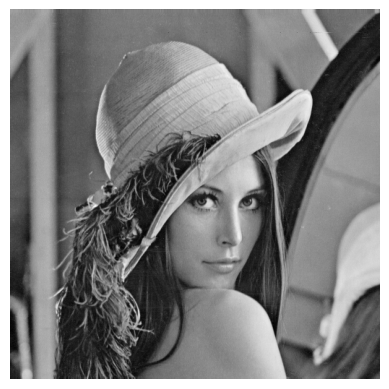

In [9]:
# Task 5: Channel Averaging
def channel_averaging(image_array):
    # Convert to float to avoid overflow when summing
    red_channel = image_array[:, :, 0].astype(np.float32)
    green_channel = image_array[:, :, 1].astype(np.float32)
    blue_channel = image_array[:, :, 2].astype(np.float32)

    # Compute the average
    average = ((red_channel + green_channel + blue_channel) / 3).astype(np.uint8)

    # Convert to grayscale image
    average_image = Image.fromarray(average)

    plot_image(average_image)

    # Save the result
    average_image.save("5_average.png")

channel_averaging(image_array)

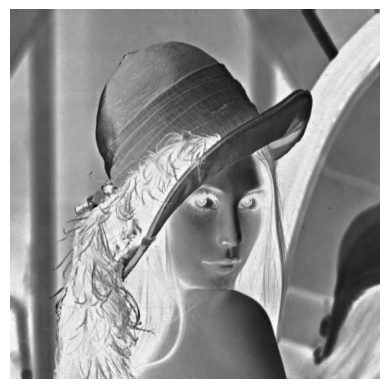

In [10]:
# Task 6: Image Negation
def image_negation():
    image = Image.open("4_grayscale.png")
    image_array = np.array(image)

    new_array = 255-image_array

    new_image= Image.fromarray(new_array.astype(np.uint8))

    plot_image(new_image)
    
    new_image.save("6_negative.png")


image_negation()

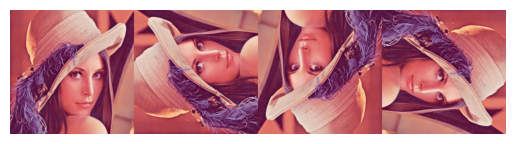

In [11]:
# Task 7: Image Rotation and Composition
def rotate_and_compose(image_array):
    # Get image dimensions
    height, width, _ = image_array.shape

    # Define crop size
    crop_size = 372

    # Compute top-left corner of the crop (center crop)
    start_y = (height - crop_size) // 2
    start_x = (width - crop_size) // 2

    # Crop the image
    cropped_array = image_array[start_y:start_y+crop_size, start_x:start_x+crop_size]


    rot_0 = cropped_array.copy()
    rot_90 = np.rot90(cropped_array, k=1)       # Rotate cropped array by 90 degrees
    rot_180 = np.rot90(cropped_array, k=2)       # Rotate cropped array by 180 degrees
    rot_270 = np.rot90(cropped_array, k=3)       # Rotate cropped array by 270 degrees

    combined_array = np.concatenate((rot_0, rot_90, rot_180, rot_270), axis=1)
    combined_image= Image.fromarray(combined_array)

    plot_image(combined_image)

    combined_image.save("7_rotation.png")

rotate_and_compose(image_array)


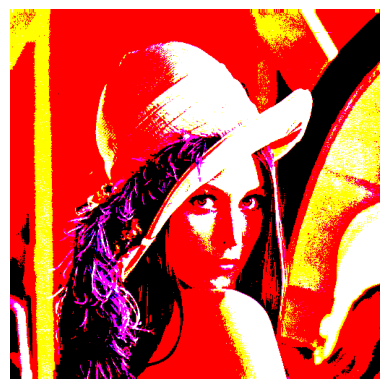

In [12]:
# Task 8: Create a Binary Mask
def create_binary_mask(image_array):
    binary_mask = np.where(image_array > 127, 255, 0).astype(np.uint8)

    # Convert the binary mask array back to a PIL image
    new_img = Image.fromarray(binary_mask)

    plot_image(new_img)
    
    new_img.save("8_mask.png")

create_binary_mask(image_array)

In [13]:
# Task 9: Analyze Masked Pixels
# Approach
# 1. Read Lenna.png and convert it to numpy array
# 2. only select the pixels which got masked in Task 8
# 3. take average of pixels values on each R,G and B channel separately

def analyze_masked_pixels(image_array):
    
    binary_mask = np.where(image_array > 127, 255, 0).astype(np.uint8)

    # Create a boolean mask for each channel
    mask_bool = binary_mask == 255

    # Extract R, G, B channels
    red_channel   = image_array[:, :, 0]
    green_channel = image_array[:, :, 1]
    blue_channel  = image_array[:, :, 2]

    # Apply mask and compute mean only for masked pixels
    red_avg   = red_channel[mask_bool[:, :, 0]].mean()
    green_avg = green_channel[mask_bool[:, :, 1]].mean()
    blue_avg  = blue_channel[mask_bool[:, :, 2]].mean()

    print("Average Red {:.2f}, Average green {:.2f} and average blue {:.2f}".format(red_avg, green_avg, blue_avg))

analyze_masked_pixels(image_array)


Average Red 200.77, Average green 161.95 and average blue 155.97


In [14]:
# Task 9: Analyze Masked Pixels
# Approach
# 1. Read Lenna.png and convert it to numpy array
# 2. Mask the image
# 3. take average of pixels on each R,G and B channel separately

def analyze_masked_pixels(image_array):
    
    binary_mask = np.where(image_array > 127, 255, 0).astype(np.uint8)

    red_mask_mean =  binary_mask[:, :, 0].mean()
    green_mask_mean = binary_mask[:, :, 1].mean()
    blue_mask_mean = binary_mask[:, :, 2].mean()

    print("Average Red {:.2f}, Average green {:.2f} and average blue {:.2f}".format(red_mask_mean, green_mask_mean, blue_mask_mean))

analyze_masked_pixels(image_array)

Average Red 203.91, Average green 78.10 and average blue 56.95


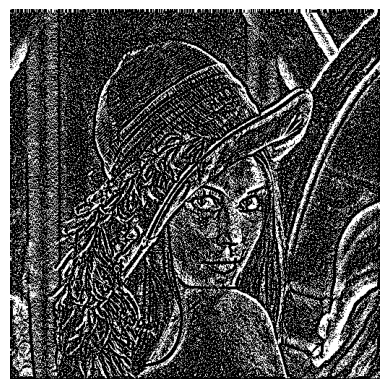

In [ ]:

# Task 10: Maximum Value Highlighting

def highlight_maximum(image_path):
    # Load grayscale image
    img = Image.open(image_path).convert("L")
    img_array = np.array(img)

    window=5
    new_img_array= np.zeros_like(img_array)
    for i in range(img_array.shape[0]-window+1):
        for j in range(img_array.shape[1]-window+1):
            small_mat = img_array[i:i+window, j:j+window]
            local_max = np.max(small_mat)
            
            # Find coordinates of local_max within the small_mat
            coords = np.argwhere(small_mat == local_max)

            # map the local maxima coordinates to original image
            max_r = coords[0][0]+i
            max_c = coords[0][1]+j

            # set the cordinates where maxima appears to 255
            new_img_array[max_r, max_c] = 255

    new_img = Image.fromarray(new_img_array)

    plot_image(new_img)

    new_img.save("10_nonmax.png")

highlight_maximum("4_grayscale.png")